In [2]:
# bibliotecas
import numpy as np
import scipy as sp
from numpy import pi, sin, cos, exp, sqrt, tan
import pylab as plt
import scipy.constants as cte
from scipy.constants import hbar, epsilon_0
from scipy.interpolate import interp1d
from scipy.integrate import quad, nquad
import timeit
from scipy.special import jv, kn

In [28]:
# constantes do problema

deltaEc = 1.25*cte.e # altura do poco do eletron
deltaEv = 1.45*cte.e # altura do poco do buraco
me = cte.m_e*.15 # massa efetiva do eletron
mh = cte.m_e*0.14 # massa efetiva do buraco
cte_dielet = 4.96 # cte dieletrica
camadas = 10 # numero de camadas
a = camadas*.59e-9/2 # espessura do nanoplatelete

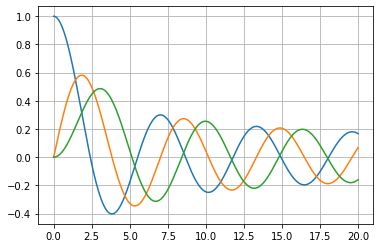

In [29]:
xs = np.linspace(0, 20, 1000)

plt.plot(xs, jv(0, xs))
plt.plot(xs, jv(1, xs))
plt.plot(xs, jv(2, xs))
plt.grid(True)
plt.show()

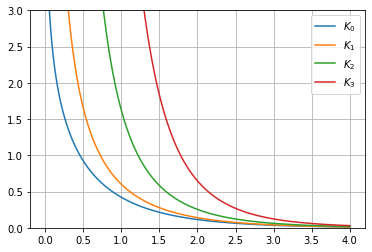

In [30]:
xs = np.linspace(0, 4, 1000)

plt.plot(xs, kn(0, xs), label=r'$K_0$')
plt.plot(xs, kn(1, xs), label=r'$K_1$')
plt.plot(xs, kn(2, xs), label=r'$K_2$')
plt.plot(xs, kn(3, xs), label=r'$K_3$')
plt.ylim(0,3)
plt.grid(True)
plt.legend()
plt.show()

In [56]:
global m
k = lambda E: sqrt(2*me*E)/hbar
kappa = lambda E: sqrt(2*me*(deltaEc - E))/hbar
fTransc = lambda E: k(E)*(jv(m - 1, k(E)*a) - jv(m + 1, k(E)*a)) +  kappa(E)*jv(m, k(E)*a)/kn(m, kappa(E)*a)*(kn(m - 1, kappa(E)*a) + kn(m + 1, kappa(E)*a))

In [57]:
def graficos(ma):
    global m
    m = ma
    Es = np.linspace(0, deltaEc, 1000)
    plt.plot(Es, [fTransc(Ei) for Ei in Es], label=r'$m = $' + str(m))
    plt.grid(True)
    plt.legend()
    plt.show()

C:\Users\Gabriel\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


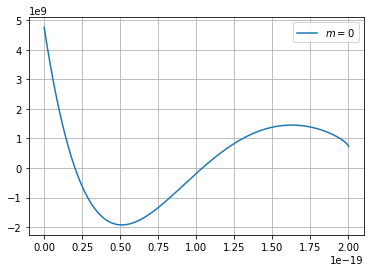

In [58]:
graficos(0)

In [59]:
for Ei in np.linspace(0, deltaEc, 10000):
    if fTransc(Ei)*fTransc(Ei + deltaEc/10000) < 1:
        Ee = Ei
        break
print(Ei)
ke = k(Ee)
kappae = kappa(Ee)

2.024953216539154e-20


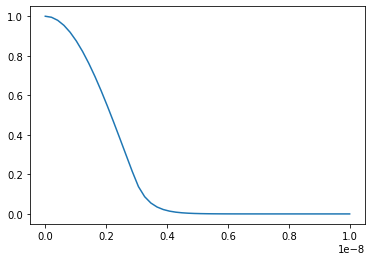

In [60]:
xs = np.linspace(0, 1e-8)
def psie(x):
    if x < a:
        return jv(0, ke*x)
    else:
        return jv(0, ke*a)/kn(0, kappae*a)*kn(0, kappae*x)
        
plt.plot(xs, [psie(xi) for xi in xs])

C:\Users\Gabriel\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


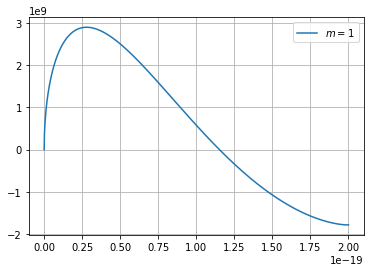

In [32]:
graficos(1)

C:\Users\Gabriel\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


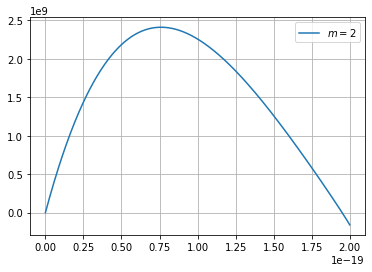

In [33]:
graficos(2)

C:\Users\Gabriel\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


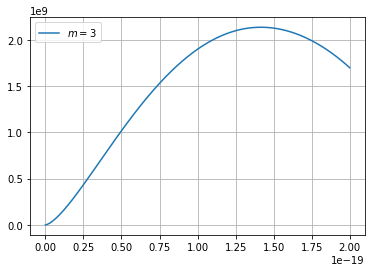

In [35]:
graficos(3)